In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [ ]:
start_file_path = '/content/drive/My Drive/articles/relevant_articles'

In [ ]:
df = pd.read_pickle(f'{start_file_path}/df_relevant_articles.pkl')

In [ ]:
df.columns

Index(['title', 'text', 'url', 'source_domain', 'date_published', 'authors',
       'matched_keywords', 'description', 'full_text'],
      dtype='object')

In [ ]:
len(df) / 78768 * 100

30.991011578305912

In [ ]:
counts_per_newssite = {}

for source_domain in df['source_domain'].unique():
  counts_per_newssite[source_domain] = len(df[df['source_domain'] == source_domain])

In [ ]:
counts_per_newssite

{'apnews.com': 1903,
 'bbc.com': 1317,
 'cnn.com': 1172,
 'dailymail.co.uk': 1697,
 'foxnews.com': 1172,
 'theguardian.com': 5543,
 'hindustantimes.com': 2187,
 'independent.co.uk': 3053,
 'india.com': 222,
 'indianexpress.com': 1380,
 'nbcnews.com': 530,
 'news18.com': 1923,
 'newsweek.com': 837,
 'nypost.com': 904,
 'usatoday.com': 571}

In [ ]:
raw_counts = {
    "apnews.com": 6536,
    "bbc.com": 4934,
    "cnn.com": 3108,
    "dailymail.co.uk": 9562,
    "foxnews.com": 9324,
    "theguardian.com": 8148,
    "hindustantimes.com": 4790,
    "independent.co.uk": 9240,
    "india.com": 743,
    "indianexpress.com": 4331,
    "nbcnews.com": 2353,
    "news18.com": 3196,
    "newsweek.com": 5722,
    "nypost.com": 4125,
    "usatoday.com": 2656
}

In [ ]:
after_preprocessing = {
    "apnews.com": 5953,
    "bbc.com": 3586,
    "cnn.com": 2927,
    "dailymail.co.uk": 9188,
    "foxnews.com": 9030,
    "theguardian.com": 8147,
    "hindustantimes.com": 4587,
    "independent.co.uk": 9131,
    "india.com" : 415,
    "indianexpress.com": 3761,
    "nbcnews.com": 2084,
    "news18.com": 3191,
    "newsweek.com": 4860,
    "nypost.com": 4118,
    "usatoday.com": 2626
}

In [ ]:
df_all = pd.DataFrame({
    'original': raw_counts,
    'after preprocessing': after_preprocessing,
    'after classification' : counts_per_newssite
})


In [ ]:
df_all.reset_index(inplace=True)

In [ ]:
df_all.rename(columns={'index': 'newssite'}, inplace=True)

In [ ]:
newssite_formatting = {
            'apnews.com': 'AP News',
            'bbc.com' : 'BBC',
            'cnn.com' : 'CNN',
            'foxnews.com' : 'Fox News',
            'dailymail.co.uk' : 'Dailymail',
            'theguardian.com' : 'Guardian',
            'hindustantimes.com' : 'Hindustan Times',
            'india.com' : 'India',
            'independent.co.uk' : 'Independent',
            'indianexpress.com' : 'Indian Express',
            'news18.com': 'News 18',
            'nbcnews.com' : 'NBC',
            'nypost.com' : 'NY Post',
            'newsweek.com' : 'Newsweek',
            'usatoday.com' : 'USA Today'
        }

In [ ]:
df_all['newssite'] = df_all['newssite'].map(newssite_formatting)


In [ ]:
df_all.rename(columns = {'original':'Original', 'after preprocessing':'After Pre-processing', 'after classification':'After Classification'}, inplace=True)

In [ ]:
df_all.columns

Index(['newssite', 'Original', 'After Pre-processing', 'After Classification'], dtype='object')

In [ ]:
df_plot = df_all[['newssite', 'Original', 'After Classification']]

df_plot['Filtered Out'] = df_plot['Original'] - df_plot['After Classification']

df_plot.rename(columns={'After Classification': 'Remaining'}, inplace=True)

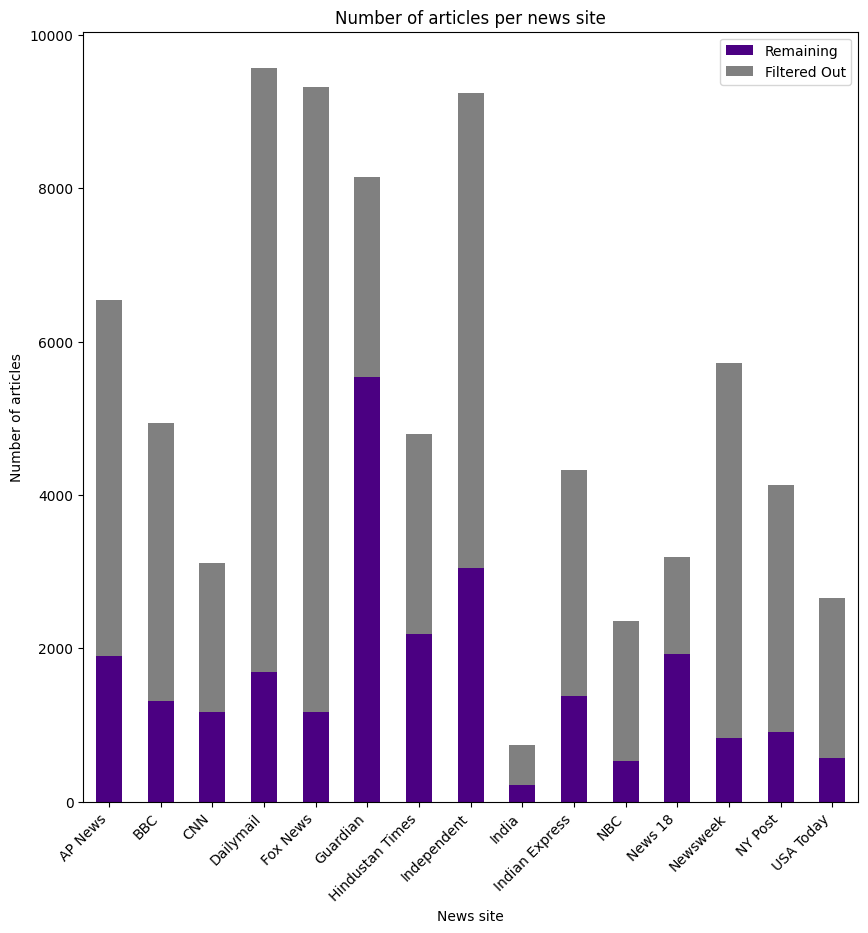

In [ ]:
ax = df_plot[['newssite', 'Remaining', 'Filtered Out']].plot(x='newssite', kind='bar', stacked=True, xlabel='News site', ylabel='Number of articles', color=['indigo', 'grey'], figsize=(10, 10), title="Number of articles per news site")
ax.set_xticklabels(df_plot['newssite'], rotation=45, ha="right")
ax.figure.savefig('articlesafterclassification.png', bbox_inches="tight")

In [ ]:
df_all['Percentage of Articles'] = df_all['After Classification'] / df_all['Original'] * 100

In [ ]:
def newssite_to_region(newssite):
      if newssite in ['Dailymail', 'Independent', 'Guardian', 'BBC']:
        return 'UK'
      elif newssite in ['Hindustan Times', 'India', 'Indian Express', 'News 18']:
        return 'India'
      else:
        return 'US'

df_all['Region'] = df_all['newssite'].apply(newssite_to_region)

In [ ]:
df_all['Percentage filtered out'] = 100 - df_all['Percentage of Articles']

In [ ]:
df_all[['newssite', 'Original', 'After Classification', 'Percentage filtered out', 'Region']].sort_values(by='Percentage filtered out', ascending=False)

,newssite,Original,After Classification,Percentage filtered out,Region
4,Fox News,9324,1172,87.430287,US
12,Newsweek,5722,837,85.372247,US
3,Dailymail,9562,1697,82.252667,UK
14,USA Today,2656,571,78.501506,US
13,NY Post,4125,904,78.084848,US
10,NBC,2353,530,77.475563,US
1,BBC,4934,1317,73.307661,UK
0,AP News,6536,1903,70.884333,US
8,India,743,222,70.121131,India
9,Indian Express,4331,1380,68.136689,India


In [ ]:
month_tally = defaultdict(int)
region_month_tally = defaultdict(lambda: defaultdict(int))

def get_region(newssite):
   if newssite in ['dailymail.co.uk', 'independent.co.uk', 'theguardian.com', 'bbc.com']:
        return 'UK'
   elif newssite in ['hindustantimes.com', 'india.com', 'indianexpress.com', 'news18.com']:
        return 'India'
   else:
        return 'US'

for _, article in df.iterrows():
  date = article['date_published']
  month_year = "-".join(date.split("-")[0:2])
  month_tally[month_year] += 1
  region = get_region(article['source_domain'])
  region_month_tally[region][month_year] += 1


In [ ]:
date_df = pd.DataFrame(list(month_tally.items()), columns=["Date", "Count"])
date_df.sort_values(by='Date', inplace=True)
date_df.reset_index(drop=True, inplace=True)

In [ ]:
date_df_us = pd.DataFrame(list(region_month_tally['US'].items()), columns=["Date", "Count"])
date_df_us.sort_values(by='Date', inplace=True)
date_df_us.reset_index(drop=True, inplace=True)
date_df_uk = pd.DataFrame(list(region_month_tally['UK'].items()), columns=["Date", "Count"])
date_df_uk.sort_values(by='Date', inplace=True)
date_df_uk.reset_index(drop=True, inplace=True)
date_df_india = pd.DataFrame(list(region_month_tally['India'].items()), columns=["Date", "Count"])
date_df_india.sort_values(by='Date', inplace=True)
date_df_india.reset_index(drop=True, inplace=True)

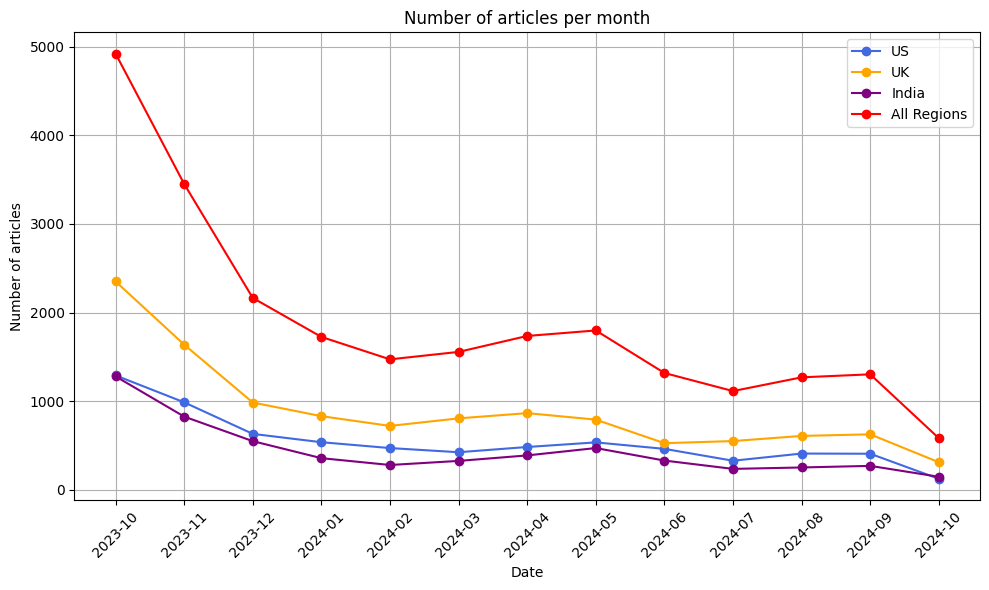

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(date_df_us['Date'], date_df_us['Count'], marker='o', color='royalblue', label="US")
plt.plot(date_df_uk['Date'], date_df_uk['Count'], marker='o', color='orange', label="UK")
plt.plot(date_df_india['Date'], date_df_india['Count'], marker='o', color='purple', label="India")
plt.plot(date_df['Date'], date_df['Count'], marker='o', color='red', label="All Regions")
plt.legend(loc="upper right")
plt.title('Number of articles per month')
plt.xlabel('Date')
plt.ylabel('Number of articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.savefig('articlespermonthafterclassification.png')

## **AVERAGES FOR BERT AND ROBERTA FOLDS**

In [ ]:
bert_data = {
    'Fold': [1, 2, 3, 4, 5],
    'Accuracy': [1.00, 0.88, 0.78, 0.95, 0.85],
    'Precision': [1.00, 0.77, 0.58, 1.00, 0.67],
    'Recall': [1.00, 0.83, 0.92, 0.83, 1.00],
    'F1 Score': [1.00, 0.80, 0.71, 0.91, 0.80]
}

bert_metrics_df = pd.DataFrame(bert_data)

bert_metrics_df['F1 Score'].mean()

np.float64(0.844)

In [ ]:
roberta_data = {
    'Fold': [1, 2, 3, 4, 5],
    'Accuracy': [0.93, 0.95, 0.80, 0.92, 0.80],
    'Precision': [0.85, 1.00, 0.70, 0.90, 1.00],
    'Recall': [0.92, 0.17, 0.58, 0.83, 0.33],
    'F1 Score': [0.88, 0.29, 0.64, 0.87, 0.50]
}

roberta_metrics_df = pd.DataFrame(roberta_data)

roberta_metrics_df['F1 Score'].mean()

np.float64(0.636)